In [1]:
# 환경설정

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv("../data/used_mobile_phone.csv")
print(df.info())
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4951 entries, 0 to 4950
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   create_date    4951 non-null   object 
 1   price          4951 non-null   float64
 2   text           4951 non-null   object 
 3   phone_model    4951 non-null   object 
 4   factory_price  4951 non-null   int64  
 5   maker          4951 non-null   object 
 6   price_index    4951 non-null   float64
dtypes: float64(2), int64(1), object(4)
memory usage: 270.9+ KB
None


,create_date,price,text,phone_model,factory_price,maker,price_index
0,2017-03-19 4 35 00 PM,550000.0,아이폰6플러스 블랙+애플라이트 64기가 팝니다 아이폰6플러스 블랙+애플라이트 64...,iphone 6 64gb,924000,apple,95.96
1,2016-10-26 12 08 00 PM,380000.0,갤럭시s6엣지 32기가 팝니다 직거래 갤럭시s6엣지 32기가 품명 갤럭시s6엣지제...,galaxy s6 edge 32gb,979000,samsung,103.05
2,2016-10-25 12 52 00 PM,300000.0,갤럭시s6 풀박스로 팝니다~~~ 새상품급 실기스조차 없어요 직접거래 구매한지 1...,galaxy s6 32gb,854000,samsung,103.05
3,2017-03-23 11 14 00 PM,290000.0,sk g5 티탄 폰 단품판매합니다 직접거래 sk g5 티탄 폰 단품판매합니다 올...,lg g5 32gb,836000,lg,95.96
4,2016-04-11 7 35 00 PM,280000.0,sony 엑스페리아 c5 ultra e5506 16gb 미사용 새제품 팝니다 1...,lg u 32gb,396000,lg,102.59


# 개별 피처 탐색기 : data 피처 탐색

In [3]:
# create_data 로 부터 '월'을 의미하는 month정보를 피처로 추출
df['month']=df['create_date'].apply(lambda x:x[:7])

# 월별 거래 횟수를 계산하여 출력

In [4]:
df['month'].value_counts()

2016-10    2956
2017-03    1311
2016-08     107
2016-09     105
2016-04     102
2016-05      89
2016-06      76
2016-07      74
2016-03      70
2016-02      61
Name: month, dtype: int64

# 일별 거래 횟수를 계산하여 그래프 출력

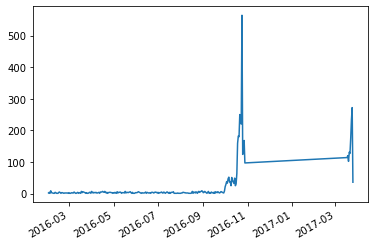

In [5]:
df_day = pd.to_datetime(df['create_date'].apply(lambda x:x[:10])).value_counts()
df_day.plot()
plt.show()

# 가격의 분포를 그래프

<AxesSubplot:>

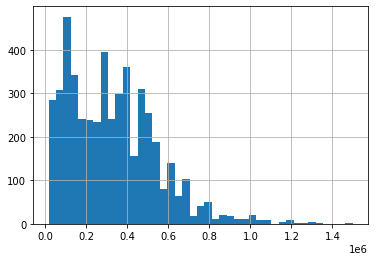

In [6]:
df['price'].hist(bins ='auto')

## 휴대폰 기종(phone_model)별 가격의 평균과 표준편차

In [7]:
# 평균
df_price_model_mean = df.groupby('phone_model')['price'].transform(lambda x:np.mean(x))
# 표준편차
df_price_model_std = df.groupby('phone_model')['price'].transform(lambda x:np.std(x))



# 이를 바탕으로 모든 데이터의 z-score를 계산

<AxesSubplot:>

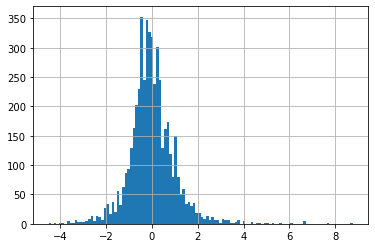

In [8]:
# 가격이 기종별 평균에 비해 어느정도로 높거나 낮은지 확인
# 공식
df_price_model_z_score = (df['price']-df_price_model_mean)/df_price_model_std
# z-score 시각화
df_price_model_z_score.hist(bins='auto')

# factory_price 피처의 분포 탐색

<AxesSubplot:>

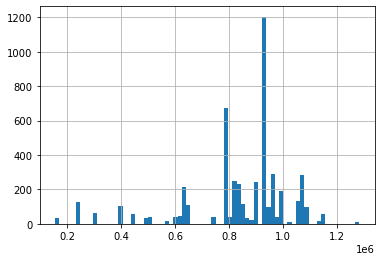

In [9]:
df['factory_price'].hist(bins='auto')

# factory_price 와 price 피처를 산점도 그래프로 출력하여 상관관계 확인

<AxesSubplot:xlabel='factory_price', ylabel='price'>

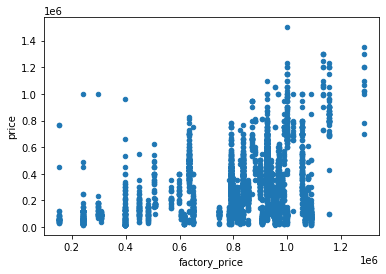

In [10]:

df.plot.scatter(x='factory_price',y='price')


# 기종별 총 거래 데이터 개수를 집계

In [11]:
model_counts = df['phone_model'].value_counts()
print(model_counts.describe())

count      64.000000
mean       77.359375
std       143.432786
min        10.000000
25%        23.000000
50%        35.000000
75%        90.500000
max      1002.000000
Name: phone_model, dtype: float64


## 기종별 총 거래 데이터 개수를 상자 그래프로 확인

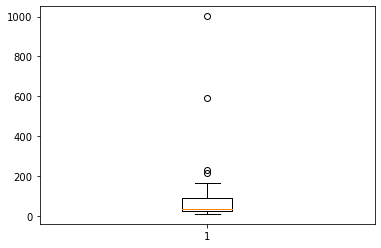

In [12]:
plt.boxplot(model_counts)
plt.show()

# Random forest regressor 를 이용한 가격예측

In [13]:
# 랜덤포레스트 회귀분석을 위한 도구 준비

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction import DictVectorizer
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error


# 데이터를 학습/테스트용 데이터로 분리

In [14]:
df

,create_date,price,text,phone_model,factory_price,maker,price_index,month
0,2017-03-19 4 35 00 PM,550000.0,아이폰6플러스 블랙+애플라이트 64기가 팝니다 아이폰6플러스 블랙+애플라이트 64...,iphone 6 64gb,924000,apple,95.96,2017-03
1,2016-10-26 12 08 00 PM,380000.0,갤럭시s6엣지 32기가 팝니다 직거래 갤럭시s6엣지 32기가 품명 갤럭시s6엣지제...,galaxy s6 edge 32gb,979000,samsung,103.05,2016-10
2,2016-10-25 12 52 00 PM,300000.0,갤럭시s6 풀박스로 팝니다~~~ 새상품급 실기스조차 없어요 직접거래 구매한지 1...,galaxy s6 32gb,854000,samsung,103.05,2016-10
3,2017-03-23 11 14 00 PM,290000.0,sk g5 티탄 폰 단품판매합니다 직접거래 sk g5 티탄 폰 단품판매합니다 올...,lg g5 32gb,836000,lg,95.96,2017-03
4,2016-04-11 7 35 00 PM,280000.0,sony 엑스페리아 c5 ultra e5506 16gb 미사용 새제품 팝니다 1...,lg u 32gb,396000,lg,102.59,2016-04
...,...,...,...,...,...,...,...,...
4946,2016-10-10 11 29 00 AM,1300000.0,미개봉 언락폰 아이폰7플러스 256gb 골드 iphone7 plus 강북 도봉\t ...,iphone 7 plus 256gb,1283700,apple,103.05,2016-10
4947,2016-10-24 10 03 00 PM,1300000.0,미국판 아이폰7 256g 제트블랙 강남역삼 2대 미개봉언락 애플 a1660 강남역삼...,iphone 7 256gb,1130800,apple,103.05,2016-10
4948,2016-09-19 10 15 00 AM,1300000.0,"아이폰7 미개봉 홍콩판 팝니다 케이스,강화유리서비스 종류다양 아이폰7 917,91...",iphone 7 256gb,1130800,apple,103.05,2016-09
4949,2016-10-05 12 22 00 AM,1350000.0,미개봉 언락폰 아이폰7플러스 256gb 골드 iphone7 plus 강북 도봉 미개...,iphone 7 plus 256gb,1283700,apple,103.05,2016-10


In [15]:
df = df[['price','phone_model','factory_price','maker','price_index','month']]
df=pd.get_dummies(df,columns=['phone_model','maker','month'])
X = df.loc[:,df.columns !='price']
y=df['price']
X_train, X_test,y_train,y_test= train_test_split(X,y,test_size=0.3,random_state=0)

# 랜덤 포레스트 모델을 학습

In [16]:
forest = RandomForestRegressor(n_estimators=1000,criterion='mse')
forest.fit(X_train,y_train)
y_train_pred = forest.predict(X_train)
y_test_pred = forest.predict(X_test)


# 학습한 모델 평가

In [21]:
print('MSE train : %.3f,test:%.3f'%(mean_squared_error(y_train,y_train_pred),
                                   mean_squared_error(y_test,y_test_pred)))

print('R^2 train: %.3f,test:%.3f'%(r2_score(y_train,y_train_pred),
                                  r2_score(y_test,y_test_pred)))

MSE train : 10623613682.153,test:13863609256.871
R^2 train: 0.781,test:0.683


# 학습한 모델의 피처 중요도 시각화

[('factory_price', 0.40510483118879886),
 ('maker_apple', 0.2976760865908189),
 ('phone_model_galaxy s3 3g 8gb', 0.022192478512466664),
 ('phone_model_iphone se 64gb', 0.021690444681621443),
 ('price_index', 0.02053967278471495),
 ('phone_model_galaxy s4 32gb', 0.015514368710182686),
 ('month_2017-03', 0.014857377308567692),
 ('maker_samsung', 0.014252947806584154),
 ('phone_model_galaxy s6 32gb', 0.012427079588475637),
 ('month_2016-05', 0.010930025327289913)]

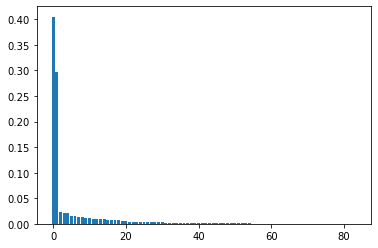

In [26]:
# 학습한 모델의 피처 중요도를 출력
importances = forest.feature_importances_
indices = np.argsort(importances)[::-1]
plt.bar(range(X.shape[1]),importances[indices])

# 학습한 모델의 피처 중요도 출력
feat_labels = X.columns.tolist()
feature = list(zip(feat_labels,forest.feature_importances_))

sorted(feature,key=lambda tup:tup[1],reverse=True)[:10]

In [28]:
# month  피처 중 , 영향력이 높은 순으로 정렬
for sorted_feature in sorted(feature,key=lambda tup: tup[1],reverse=True):
    if "month" in sorted_feature[0]:
        print(sorted_feature)

('month_2017-03', 0.014857377308567692)
('month_2016-05', 0.010930025327289913)
('month_2016-09', 0.008429660530377385)
('month_2016-04', 0.00751525416982703)
('month_2016-10', 0.006466511903677138)
('month_2016-06', 0.004439847639304161)
('month_2016-08', 0.0037151313331623636)
('month_2016-07', 0.002720603670765387)
('month_2016-03', 0.002447133419368585)
('month_2016-02', 0.0010481519176245315)


# 텍스트 전처리

In [29]:
import pickle
import re

# 중고나라 불용어 사전을 불러옴
# rb는 2진수 읽는 방식 f
with open('../data/used_mobile_phone_stopwords.pkl','rb') as f:
    stopwords = pickle.load(f)
    
# 불용어 사전에 등록된 단어 10개를 출력
print(stopwords[:10])

['거래', '입니', '판매', '아이폰', '갤럭시', '골드', '팝', '만원', '폰', '시']


# 형태소 단위로 추출

In [68]:
from konlpy.tag import Okt


### '+'를 제외한 특수문자를 제거하고 , 숫자형태의 문자를 제거

def text_cleaning(text):
    # +기호 공백화
    text = ''.join(c for c in text if c.isalnum() or c in '+, ')
    # 숫자를 공백화
    text = ''.join([i for i in text if not i.isdigit()])
    return text

### 불용어에 등장하지 않는 형태소만을 추출하여 반환하는 함수

def get_pos(x):
    tagger = Okt()
    poses = tagger.pos(x)
    return [pos[0] for pos in poses if pos[0] not in stopwords]

### 위 함수들을 적용한 형태소 추출을 테스트

df['text'] = df['text'].apply(lambda x:text_cleaning(x))
result = get_pos(df['text'][0])
print(result)

KeyError: 'text'